### Dimentions and basic variables

- **Nx** = no of x dim
- **Ny** = no of y dim

- **Nt** = no of iterations


- **Node_dirn** = 9 # no of directions

- **cxs , cys** : discrete node velocities corresponding to the respective node in x , y direction

- **weights** : weight of node corresponding to each node

- **tau** : timescale corresponding to kinematic viscosity

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Nx = 400
Ny = 100
tau = .53
Node_dirn = 9
iter_count = 3000
cxs = np.array([0,0,1,1,1,0,-1,-1,-1])
cys = np.array([0,1,1,0,-1,-1,-1,0,1])

### Distribution function **F** at initial condition

- **F** : F(y,x,node)

#### need to give some noise to each lattice points

```py
F = np.ones((Ny,Nx,Node_dirn)) + 0.01 * np.random.rand(Ny,Nx,Node_dirn)
```

In [3]:
F = np.ones((5,10,9)) # suppose Ny = 5,Nx =10, Node_dirn = 9
print(F)

[[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
  

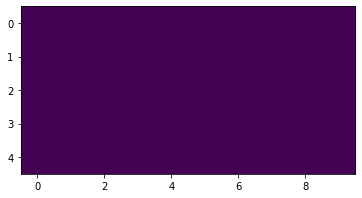

In [14]:
# plot F
plt.imshow(F[:,:,0])

In [15]:
# add slight randomness

F = np.ones((Ny,Nx,Node_dirn)) + .01 * np.random.rand(Ny,Nx,Node_dirn) 

print(F)

[[[1.00895354 1.00060021 1.00753166 ... 1.00097132 1.00930988 1.00647044]
  [1.00843162 1.00805742 1.00260859 ... 1.00636717 1.00992298 1.0078563 ]
  [1.00486369 1.0061639  1.0033488  ... 1.00128255 1.00219169 1.00102219]
  ...
  [1.00016967 1.00371338 1.00280597 ... 1.00321591 1.00025398 1.00026483]
  [1.00472342 1.00569705 1.00825855 ... 1.00221998 1.00722011 1.00382951]
  [1.00318704 1.00284249 1.00812495 ... 1.00865858 1.00703514 1.00623448]]

 [[1.00833059 1.00841552 1.00489154 ... 1.00964737 1.00085186 1.00836287]
  [1.00104622 1.00955933 1.0023529  ... 1.00505544 1.00051322 1.001385  ]
  [1.0079673  1.00895131 1.00708044 ... 1.0091089  1.00546024 1.0055306 ]
  ...
  [1.00247305 1.00413805 1.00587449 ... 1.00626407 1.00052275 1.00365902]
  [1.00864551 1.00607283 1.00356275 ... 1.0097414  1.00926715 1.00591031]
  [1.00182324 1.0000298  1.0000982  ... 1.00893316 1.00649727 1.00778556]]

 [[1.00437276 1.00194697 1.00725369 ... 1.00949423 1.00482035 1.00714723]
  [1.006935   1.007117

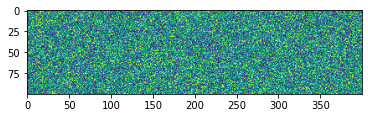

In [23]:
# plot it
plt.imshow(F[:,:,0])

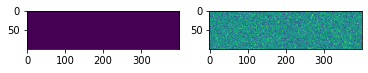

In [25]:
# difference between 

F_1 = np.ones((Ny,Nx,Node_dirn)) 
F_2 = np.ones((Ny,Nx,Node_dirn)) + .01 * np.random.rand(Ny,Nx,Node_dirn)

# plot both in same figure
fig, ax = plt.subplots(1,2)
ax[0].imshow(F_1[:,:,0])
ax[1].imshow(F_2[:,:,0])


### want it to flow from right to left

- add some +ve values to all right pointing  nodes


In [29]:
F = np.ones((5,10,9))   # suppose Ny = 5,Nx =10, Node_dirn = 9
F[:,:,3] = 2.3
print(F)


[[[1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]]

 [[1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]]

 [[1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1. ]
  [1.  1.  1.  2.3 1.  1.  1.  1.  1

### creating the Obstacle

- **False** : no obstacle
- **True** : obstacle

### circle

#### Algorithm

- a,b : centre of the circle
- r = radius of the circle

initially set all Lattices in space to be False

- for each Lattice coordinates x,y
    - if (x-a)^2 + (y-b)^2 < r^2
        - set the node to be an True / obstacle

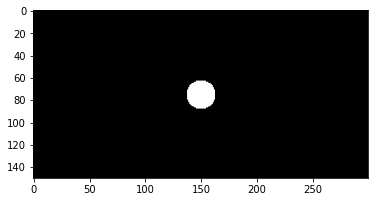

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def distance(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

Nx = 300
Ny = 150

space = np.full((Ny,Nx),False)
for y in range(0,Ny):
    for x in range(0,Nx):
        if distance(x,y,Nx/2,Ny/2) < 13:
            space[y][x] = True

# plot the space
plt.imshow(space, cmap='gray')

### square

#### Algorithm

- a,b : top left corner of the rectangle
- c,d : bottom right corner of the rectangle




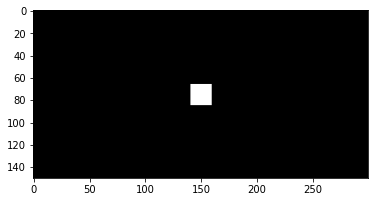

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def distance(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

Nx = 300
Ny = 150

space = np.full((Ny,Nx),False)

# make a rectangle
for y in range(0,Ny):
    for x in range(0,Nx):
        if x > Nx/2 - 10 and x < Nx/2 + 10 and y > Ny/2 - 10 and y < Ny/2 + 10:
            space[y][x] = True

# plot

plt.imshow(space, cmap='gray')

# Triangle

- a,b : top left corner of the triangle
- c,d : bottom right corner of the triangle
- e,f : bottom left corner of the triangle



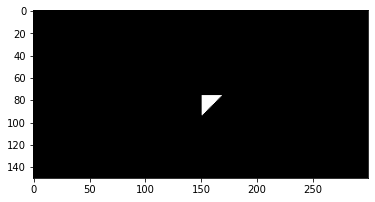

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def distance(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

Nx = 300
Ny = 150

space = np.full((Ny,Nx),False)

x1,y1 = Nx/2,Ny/2
x2,y2 = Nx/2 + 20,Ny/2
x3,y3 = Nx/2,Ny/2 + 20

for y in range(0,Ny):
    for x in range(0,Nx):
        c1 = (x2-x1)*(y-y1)-(y2-y1)*(x-x1)
        c2 = (x3-x2)*(y-y2)-(y3-y2)*(x-x2)
        c3 = (x1-x3)*(y-y3)-(y1-y3)*(x-x3)
        if (c1<0 and c2<0 and c3<0) or (c1>0 and c2>0 and c3>0):
            space[y][x] = True


# plot
plt.imshow(space, cmap='gray')

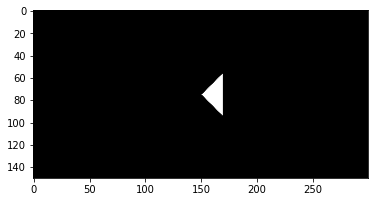

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def distance(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

Nx = 300
Ny = 150

space = np.full((Ny,Nx),False)

# make a inverted triangle

x1,y1 = Nx/2,Ny/2
x2,y2 = Nx/2 +20 ,Ny/2 - 20
x3,y3 = Nx/2 +20,Ny/2 + 20


for y in range(0,Ny):
    for x in range(0,Nx):
        c1 = (x2-x1)*(y-y1)-(y2-y1)*(x-x1)
        c2 = (x3-x2)*(y-y2)-(y3-y2)*(x-x2)
        c3 = (x1-x3)*(y-y3)-(y1-y3)*(x-x3)
        if (c1<0 and c2<0 and c3<0) or (c1>0 and c2>0 and c3>0):
            space[y][x] = True


# plot
plt.imshow(space, cmap='gray')

## Main Loop

In [11]:
# main loop runs for iter_count times
iter_count = 5 # let's run it for 5 times
for iteration in range(0,iter_count):
        print(iteration)
        print("Do Streaming Step,Collision Step")

0
Do Streaming Step,Collision Step
1
Do Streaming Step,Collision Step
2
Do Streaming Step,Collision Step
3
Do Streaming Step,Collision Step
4
Do Streaming Step,Collision Step


#### Streaming Step
-  every node move t it's corresponding node, 

```py
# axis 1 = x-axis , axis 0 = y- axis , defined in F  
        for i,cx,cy in zip(range(Node_dirn),cxs,cys):
            F[:,:,i] = np.roll(F[:,:,i],cx,axis = 1)
            F[:,:,i] = np.roll(F[:,:,i],cy,axis = 0)
```

#### demonstration of roll function

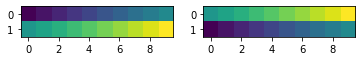

In [17]:
# use matplotlib to show rolling of the array
import numpy as np
import matplotlib.pyplot as plt

F = np.array([[1,2,3,4,5,6,7,8,9,10],[11,12,13,14,15,16,17,18,19,20]])

# roll the array by 1 row
F_rolled = np.roll(F,1,axis=0)

# plot the original and the rolled array
fig, ax = plt.subplots(1,2)
ax[0].imshow(F)
ax[1].imshow(F_rolled)



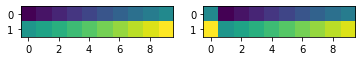

In [16]:
# roll by column
import numpy as np
import matplotlib.pyplot as plt

F = np.array([[1,2,3,4,5,6,7,8,9,10],[11,12,13,14,15,16,17,18,19,20]])

# roll the array by 1 column
F_rolled = np.roll(F,1,axis=1)

# plot the original and the rolled array
fig, ax = plt.subplots(1,2)
ax[0].imshow(F)
ax[1].imshow(F_rolled)





### Boundary Conditions

```py
bndryF = F[space,:]
bndryF = bndryF[:,[0,5,6,7,8,1,2,3,4]] # invert the discrete velocities
```

### Fluid Variables

```py
rho = np.sum(F,2) # 2nd index elements
ux = np.sum(F * cxs ,2) / rho
uy = np.sum(F * cys ,2) / rho
```
- rho : sum of discrete velocities
- ux : sum of discrete velocities * cxs
- uy : sum of discrete velocities * cys

#### set all velocities inside obstacle to zero

```py
F[space,:] = bndryF
ux[space] = 0
uy[space] = 0
```

### collision step

```py
Feq = np.zeros(F.shape)

        for i,cx,cy,w in zip(range(Node_dirn),cxs,cys,weights):
            Feq[:,:,i] =  rho * w * (
                1 + 3 *(cx*ux + cy*uy) + 9 * (cx*ux + cy*uy)**2/2 - 3 * (ux**2 + uy**2)/2
                )
        
        F = F + -(1/tau) * (F-Feq)
```